In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

runID = 'runs_122-1437'
expruns = pd.read_json('experiments/' + runID + '.json', orient='records')

In [4]:
pd.pivot_table(expruns, index=["exp_num"], values=["total_wealth"], aggfunc=np.mean)

,total_wealth
exp_num,
1,150.0
2,139.0
3,162.6
4,118.6
5,71.0
6,136.0
7,99.4
8,126.2
9,100.8


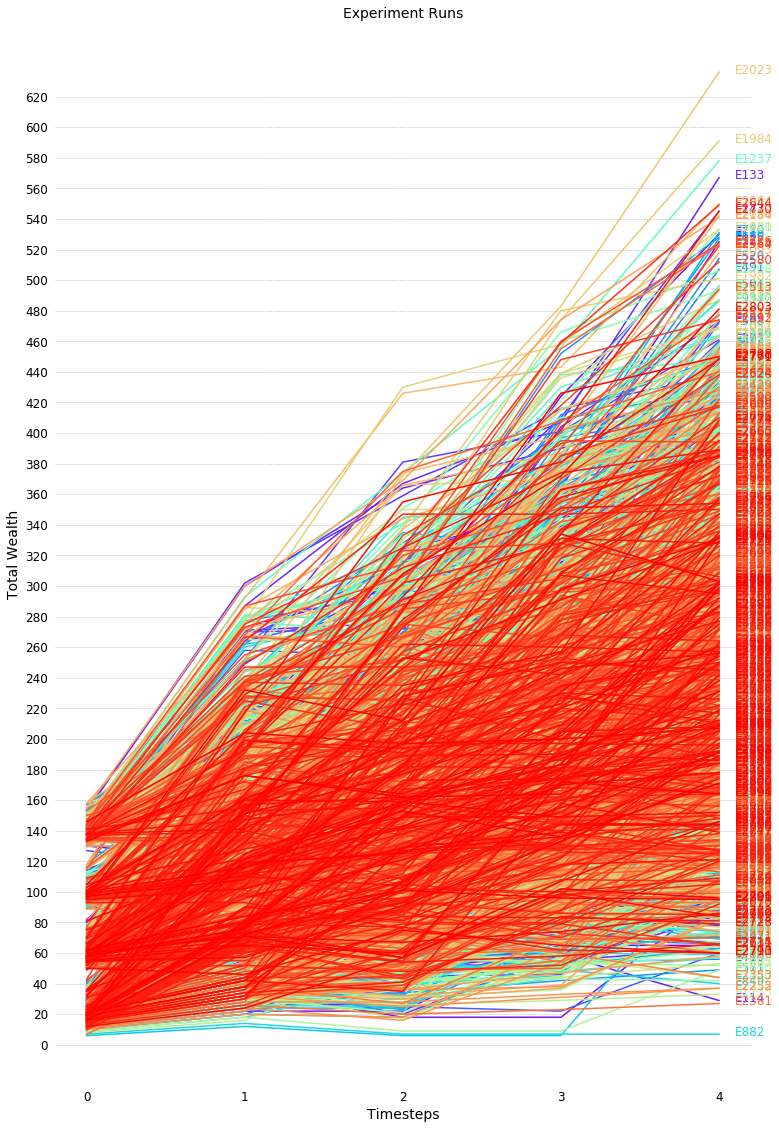

In [51]:
timesteps = list(range(0, 5))
max_exps = expruns['exp_num'].max()
exp_color=iter(cm.rainbow(np.linspace(0,1,max_exps)))

fig, ax = plt.subplots(1, 1, figsize=(14, 16))

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# ax.set_xlim(0, 4.1)
# ax.set_ylim(-0.25, expruns['total_wealth'].max())

plt.xticks(range(0, max_exps, 1), fontsize=12)
plt.yticks(range(0, expruns['total_wealth'].max(), 20), fontsize=12)

ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))

plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

for i in range(1, max_exps+1):
    c = next(exp_color)
    data = expruns.query('exp_num == ' + str(i))['total_wealth'].tolist()
#     print(data)
    plt.plot(timesteps, data, color=c)
    plt.text(4.1, data[len(data)-1] - 1, 'E'+str(i), fontsize=12, color=c)
    
plt.xlabel('Timesteps', fontsize=14)
plt.ylabel('Total Wealth', fontsize=14)
plt.title('Experiment Runs', fontsize=14, ha='center')
# plt.show()
plt.savefig('output/total_wealth_' + runID + '.png', bbox_inches="tight", dpi=150)
plt.close()